# **CNN**

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Activation
from keras.layers.normalization import BatchNormalization

In [ ]:
(a,b),(c,d) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


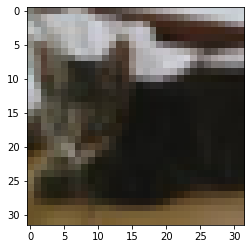

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(a[9])
plt.show()

In [ ]:
a = a/255
c = c/255

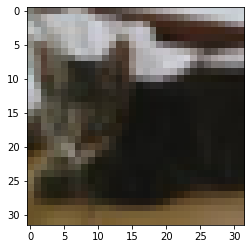

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(a[9])
plt.show()

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(b)
y_test_one_hot = to_categorical(d)

In [ ]:
a.shape

(50000, 32, 32, 3)

In [ ]:
y_train_one_hot.shape[1]

10

In [ ]:
#CNN
model = Sequential()

#Convoluation layer -- entry point
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#again
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer
model.add(Flatten())

model.add(Dense(1000,activation='relu'))
model.add(Dense(y_train_one_hot.shape[1]))
model.add(Dense(10,activation='softmax'))

In [ ]:
model

In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(a,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.3)

Epoch 1/10
137/137 [==============================] - 48s 344ms/step - loss: 1.9765 - accuracy: 0.2728 - val_loss: 1.5198 - val_accuracy: 0.4422
Epoch 2/10
137/137 [==============================] - 47s 343ms/step - loss: 1.4650 - accuracy: 0.4692 - val_loss: 1.4198 - val_accuracy: 0.4997
Epoch 3/10
137/137 [==============================] - 47s 347ms/step - loss: 1.2812 - accuracy: 0.5444 - val_loss: 1.2373 - val_accuracy: 0.5723
Epoch 4/10
137/137 [==============================] - 47s 344ms/step - loss: 1.1400 - accuracy: 0.5957 - val_loss: 1.1535 - val_accuracy: 0.5921
Epoch 5/10
137/137 [==============================] - 47s 344ms/step - loss: 1.0492 - accuracy: 0.6306 - val_loss: 1.1184 - val_accuracy: 0.6078
Epoch 6/10
137/137 [==============================] - 47s 344ms/step - loss: 0.9864 - accuracy: 0.6533 - val_loss: 1.1325 - val_accuracy: 0.6143
Epoch 7/10
137/137 [==============================] - 47s 343ms/step - loss: 0.8982 - accuracy: 0.6858 - val_loss: 1.0933 - val_ac

In [ ]:
model.evaluate(c,y_test_one_hot)[1]

10000/10000 [==============================] - 5s 470us/step


0.6796

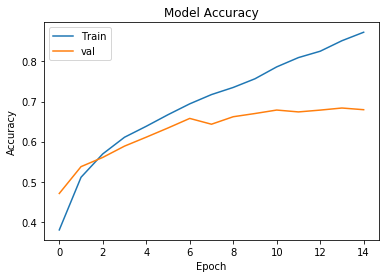

In [ ]:
#visualize the model accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

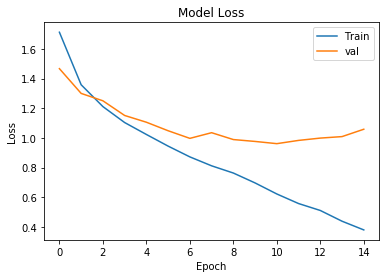

In [ ]:
#visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper right')
plt.show()

In [ ]:
model.save('animalsclassifier.h5')

In [ ]:
#Get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array([c[3],]))


probabilities

array([[9.8585343e-01, 9.4664394e-04, 2.9790442e-04, 4.9839191e-06,
        3.0631773e-04, 1.2932517e-09, 1.0739634e-08, 5.4476038e-07,
        1.2588693e-02, 1.5372244e-06]], dtype=float32)

In [ ]:
probabilities.max()

0.98585343

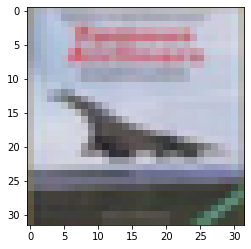

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(c[3])
plt.show()